In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from scipy import stats

import sys
sys.path.append("../utils")
from metrics import compute_recall_at4, compute_normalized_gini, compute_amex_metric

In [2]:
files = sorted(glob("../data/oof/lgbm-dart-bce-dsv02/oof-cv*.csv"))
display(files)

all_dfs = [pd.read_csv(fn) for fn in files]

df1 = all_dfs[0][["target"]].copy()
for i,df in enumerate(all_dfs):
    df1[f"pred{i}"] = df["pred"].values 
df1

['../data/oof/lgbm-dart-bce-dsv02/oof-cv0.csv',
 '../data/oof/lgbm-dart-bce-dsv02/oof-cv1.csv',
 '../data/oof/lgbm-dart-bce-dsv02/oof-cv2.csv',
 '../data/oof/lgbm-dart-bce-dsv02/oof-cv3.csv',
 '../data/oof/lgbm-dart-bce-dsv02/oof-cv4.csv']

,target,pred0,pred1,pred2,pred3,pred4
0,0,0.000240,0.000108,0.000193,0.000187,0.000135
1,0,0.000463,0.000985,0.000734,0.000895,0.001364
2,0,0.000526,0.000398,0.000509,0.000378,0.000371
3,0,0.002442,0.002819,0.001944,0.002493,0.003682
4,0,0.000813,0.000899,0.001169,0.000475,0.001166
...,...,...,...,...,...,...
458908,0,0.002931,0.004453,0.004247,0.002183,0.004931
458909,0,0.026607,0.029539,0.020109,0.022994,0.020469
458910,0,0.001134,0.001611,0.000728,0.001308,0.000746
458911,1,0.095865,0.078105,0.103415,0.071261,0.096104


In [3]:
files = sorted(glob("../data/oof/lgbm-dart-linear-bce-dsv02/oof-cv*.csv"))
display(files)

all_dfs = [pd.read_csv(fn) for fn in files]

df2 = all_dfs[0][["target"]].copy()
for i,df in enumerate(all_dfs):
    df2[f"pred{i}"] = df["pred"].values 
df2

['../data/oof/lgbm-dart-linear-bce-dsv02/oof-cv0.csv']

,target,pred0
0,0,0.000223
1,0,0.000426
2,0,0.000476
3,0,0.002455
4,0,0.000651
...,...,...
458908,0,0.003015
458909,0,0.029194
458910,0,0.001325
458911,1,0.082336


In [4]:
(df1.target == df2.target).all()

True

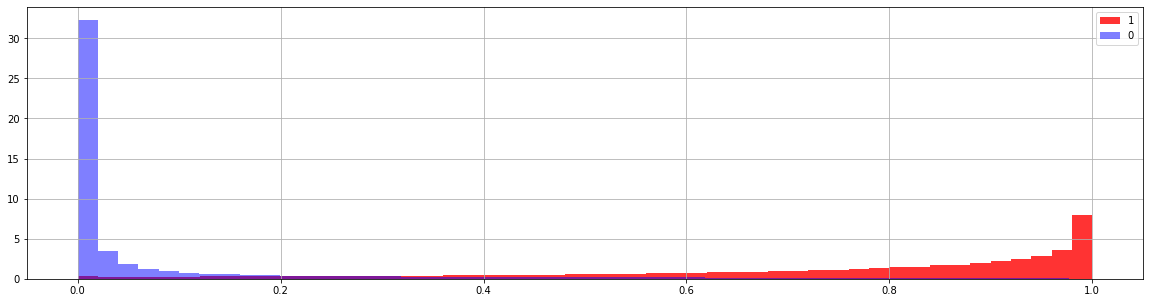

In [5]:
plt.figure(figsize=(20,5))
df1.query("target == 1").pred0.hist(bins=50, density=True, alpha=0.8, color="r", label="1")
df1.query("target == 0").pred0.hist(bins=50, density=True, alpha=0.5, color="b", label="0")
plt.legend(loc="best")
plt.show()

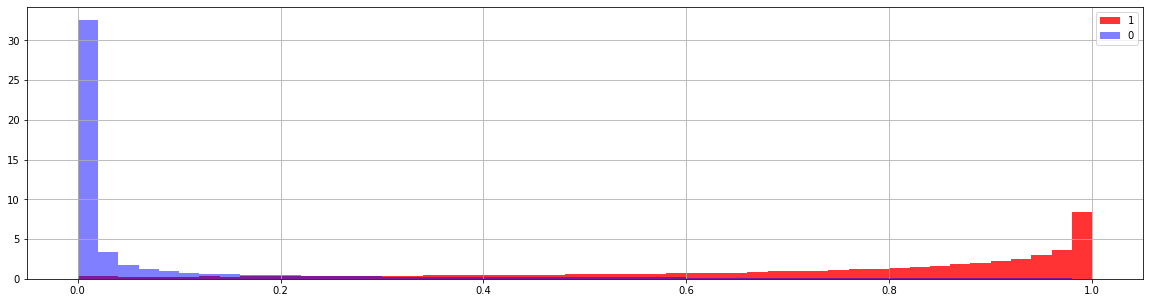

In [6]:
plt.figure(figsize=(20,5))
df2.query("target == 1").pred0.hist(bins=50, density=True, alpha=0.8, color="r", label="1")
df2.query("target == 0").pred0.hist(bins=50, density=True, alpha=0.5, color="b", label="0")
plt.legend(loc="best")
plt.show()

***
## correlation analysis

In [7]:
df1.corr(method="spearman")

,target,pred0,pred1,pred2,pred3,pred4
target,1.000000,0.702319,0.702325,0.702378,0.702270,0.702381
pred0,0.702319,1.000000,0.995408,0.995405,0.995342,0.995347
pred1,0.702325,0.995408,1.000000,0.995460,0.995424,0.995393
pred2,0.702378,0.995405,0.995460,1.000000,0.995436,0.995398
pred3,0.702270,0.995342,0.995424,0.995436,1.000000,0.995358
pred4,0.702381,0.995347,0.995393,0.995398,0.995358,1.000000


In [8]:
df2.corr(method="spearman")

,target,pred0
target,1.000000,0.702204
pred0,0.702204,1.000000


In [9]:
stats.pearsonr(df1.pred0.values, df2.pred0.values)

(0.9970854846311761, 0.0)

In [10]:
stats.spearmanr(df1.pred0.values, df2.pred0.values)

SpearmanrResult(correlation=0.9959660628995244, pvalue=0.0)

***
## blend analysis

In [11]:
for pred_col in df1.columns[1:].tolist():
    print(pred_col)
    r = compute_recall_at4(df1["target"].values, df1[pred_col].values)
    g = compute_normalized_gini(df1["target"].values, df1[pred_col].values)
    m = compute_amex_metric(df1["target"].values, df1[pred_col].values)
    print(f"R: {r:0.5f}")
    print(f"G: {g:0.5f}")
    print(f"M: {m:0.5f}")

pred0
R: 0.66851
G: 0.92566
M: 0.79709
pred1
R: 0.66834
G: 0.92567
M: 0.79700
pred2
R: 0.66818
G: 0.92574
M: 0.79696
pred3
R: 0.66786
G: 0.92559
M: 0.79673
pred4
R: 0.66955
G: 0.92574
M: 0.79764


In [12]:
df1

,target,pred0,pred1,pred2,pred3,pred4
0,0,0.000240,0.000108,0.000193,0.000187,0.000135
1,0,0.000463,0.000985,0.000734,0.000895,0.001364
2,0,0.000526,0.000398,0.000509,0.000378,0.000371
3,0,0.002442,0.002819,0.001944,0.002493,0.003682
4,0,0.000813,0.000899,0.001169,0.000475,0.001166
...,...,...,...,...,...,...
458908,0,0.002931,0.004453,0.004247,0.002183,0.004931
458909,0,0.026607,0.029539,0.020109,0.022994,0.020469
458910,0,0.001134,0.001611,0.000728,0.001308,0.000746
458911,1,0.095865,0.078105,0.103415,0.071261,0.096104


In [13]:
df1.iloc[:,1:]

,pred0,pred1,pred2,pred3,pred4
0,0.000240,0.000108,0.000193,0.000187,0.000135
1,0.000463,0.000985,0.000734,0.000895,0.001364
2,0.000526,0.000398,0.000509,0.000378,0.000371
3,0.002442,0.002819,0.001944,0.002493,0.003682
4,0.000813,0.000899,0.001169,0.000475,0.001166
...,...,...,...,...,...
458908,0.002931,0.004453,0.004247,0.002183,0.004931
458909,0.026607,0.029539,0.020109,0.022994,0.020469
458910,0.001134,0.001611,0.000728,0.001308,0.000746
458911,0.095865,0.078105,0.103415,0.071261,0.096104


In [14]:
df1["blend"] = df1[["pred0","pred1","pred2","pred3","pred4"]].mean(axis=1)

r = compute_recall_at4(df1["target"].values, df1["blend"].values)
g = compute_normalized_gini(df1["target"].values, df1["blend"].values)
m = compute_amex_metric(df1["target"].values, df1["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.67048
G: 0.92642
M: 0.79845


In [15]:
df1["blend"] = df1[["pred0","pred1","pred2","pred3","pred4"]].median(axis=1)

r = compute_recall_at4(df1["target"].values, df1["blend"].values)
g = compute_normalized_gini(df1["target"].values, df1["blend"].values)
m = compute_amex_metric(df1["target"].values, df1["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.67062
G: 0.92634
M: 0.79848


In [16]:
df1["blend"] = df1[["pred0","pred1","pred2","pred3","pred4"]].min(axis=1)

r = compute_recall_at4(df1["target"].values, df1["blend"].values)
g = compute_normalized_gini(df1["target"].values, df1["blend"].values)
m = compute_amex_metric(df1["target"].values, df1["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66970
G: 0.92620
M: 0.79795


In [17]:
df1["blend"] = df1[["pred0","pred1","pred2","pred3","pred4"]].max(axis=1)

r = compute_recall_at4(df1["target"].values, df1["blend"].values)
g = compute_normalized_gini(df1["target"].values, df1["blend"].values)
m = compute_amex_metric(df1["target"].values, df1["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66919
G: 0.92620
M: 0.79770


In [18]:
df = df1[["target","pred0"]].copy()
df.rename({"pred0":"pred_m0"}, axis=1, inplace=True)
df["pred_m1"] = df2.pred0.values
df

,target,pred_m0,pred_m1
0,0,0.000240,0.000223
1,0,0.000463,0.000426
2,0,0.000526,0.000476
3,0,0.002442,0.002455
4,0,0.000813,0.000651
...,...,...,...
458908,0,0.002931,0.003015
458909,0,0.026607,0.029194
458910,0,0.001134,0.001325
458911,1,0.095865,0.082336


In [19]:
df.pred_m0.quantile(0.96)

0.981281114634287

In [20]:
df.pred_m1.quantile(0.96)

0.9833823725387144

In [21]:
df["diff"] = df.eval("abs(pred_m0-pred_m1)")
df.sort_values("diff", ascending=False).head(50)

,target,pred_m0,pred_m1,diff
122034,1,0.041994,9.813967e-01,0.939403
164021,1,0.982323,1.106666e-01,0.871656
96813,1,0.826709,8.734322e-03,0.817974
347086,0,0.190012,9.997062e-01,0.809695
103175,0,0.804862,6.589324e-05,0.804797
252346,0,0.069070,7.497954e-01,0.680726
358017,0,0.157496,8.320551e-01,0.674559
40481,0,0.333723,9.992392e-01,0.665516
399846,1,0.794027,1.973183e-01,0.596709
407364,0,0.715832,1.284319e-01,0.587401


In [22]:
r = compute_recall_at4(df["target"].values, df["pred_m0"].values)
g = compute_normalized_gini(df["target"].values, df["pred_m0"].values)
m = compute_amex_metric(df["target"].values, df["pred_m0"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66851
G: 0.92566
M: 0.79709


In [23]:
r = compute_recall_at4(df["target"].values, df["pred_m1"].values)
g = compute_normalized_gini(df["target"].values, df["pred_m1"].values)
m = compute_amex_metric(df["target"].values, df["pred_m1"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66851
G: 0.92551
M: 0.79701


In [24]:
df["blend"] = df[["pred_m0","pred_m1"]].mean(axis=1)

r = compute_recall_at4(df["target"].values, df["blend"].values)
g = compute_normalized_gini(df["target"].values, df["blend"].values)
m = compute_amex_metric(df["target"].values, df["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66893
G: 0.92598
M: 0.79746


In [25]:
df["blend"] = df[["pred_m0","pred_m1"]].min(axis=1)

r = compute_recall_at4(df["target"].values, df["blend"].values)
g = compute_normalized_gini(df["target"].values, df["blend"].values)
m = compute_amex_metric(df["target"].values, df["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66852
G: 0.92575
M: 0.79713


In [26]:
df["blend"] = df[["pred_m0","pred_m1"]].max(axis=1)

r = compute_recall_at4(df["target"].values, df["blend"].values)
g = compute_normalized_gini(df["target"].values, df["blend"].values)
m = compute_amex_metric(df["target"].values, df["blend"].values)

print(f"R: {r:0.5f}")
print(f"G: {g:0.5f}")
print(f"M: {m:0.5f}")

R: 0.66898
G: 0.92588
M: 0.79743


***